In [143]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [144]:
df = pd.DataFrame(pd.read_csv('used_car_dataset.csv'))
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [145]:
df.columns

Index(['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [147]:
# def update_km(kilometer):
#   kilometer = kilometer.replace('km','').replace(',','').split()
#   return kilometer
# df['kms_driven']=df['kms_driven'].apply(update_km)
# print(df['kms_driven'])
df['kms_driven'] = df['kms_driven'].apply(lambda x:''.join(x).replace('km','').replace(',','').strip()).astype("float")
print(df['kms_driven'])


0       22402.0
1       10344.0
2       12999.0
3       45000.0
4       11193.0
         ...   
2100    42158.0
2101    68862.0
2102    37622.0
2103    64726.0
2104    29150.0
Name: kms_driven, Length: 2105, dtype: float64


In [148]:
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,42158.0,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,68862.0,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,37622.0,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,64726.0,Petrol,Mumbai,2017


In [149]:
def convert_price(carprice):
  carprice = carprice.replace('₹','').replace(',','').strip()
  if 'Lakh' in carprice:
    number = float(carprice.replace('Lakh','').strip())
    return number *100000
  elif 'Crore' in carprice:
    number =float(carprice.replace('Crore','').strip())
    return number *10000000
  else:
    return float(carprice)



df['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert_price)
df['car_price_in_rupees']





0        445000.0
1        293000.0
2       2249000.0
3        695000.0
4       1200000.0
          ...    
2100     360000.0
2101    2200000.0
2102     838000.0
2103     675000.0
2104     876000.0
Name: car_price_in_rupees, Length: 2105, dtype: float64

In [150]:
df = df.rename(columns={'car_price_in_rupees' :"carprice"})
df

,car_name,carprice,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,360000.0,42158.0,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,2200000.0,68862.0,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,838000.0,37622.0,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,675000.0,64726.0,Petrol,Mumbai,2017


In [151]:
df

,car_name,carprice,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,360000.0,42158.0,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,2200000.0,68862.0,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,838000.0,37622.0,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,675000.0,64726.0,Petrol,Mumbai,2017


In [152]:
#df.to_csv('new_data')

In [153]:
row,col = df.shape
print("No of row = ",row)
print("No of col = ",col)

No of row =  2105
No of col =  6


In [154]:
df.shape


(2105, 6)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   carprice             2105 non-null   float64
 2   kms_driven           2105 non-null   float64
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 98.8+ KB


In [156]:
# Counting Duplicate Values
Duplicate_Value = df.duplicated().sum()
print(f'Number of duplicated rows are = {Duplicate_Value}')

Number of duplicated rows are = 92


In [157]:
df = df.drop_duplicates()

# Checking Again
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])
print("Number of Duplicate values are =" ,df.duplicated().sum())

Number of rows :  2013
Number of columns :  6
Number of Duplicate values are = 0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   carprice             2013 non-null   float64
 2   kms_driven           2013 non-null   float64
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 110.1+ KB


In [159]:
df.describe()

,carprice,kms_driven,year_of_manufacture
count,2.013000e+03,2.013000e+03,2013.000000
mean,1.137749e+06,4.843062e+04,2017.023845
std,1.353323e+06,8.542756e+04,2.823402
min,6.000000e+04,6.400000e+01,2004.000000
25%,4.750000e+05,2.500000e+04,2015.000000
50%,6.990000e+05,4.282500e+04,2017.000000
75%,1.150000e+06,6.300000e+04,2019.000000
max,1.950000e+07,3.600000e+06,2022.000000


In [160]:
df['year_of_manufacture'].value_counts()

year_of_manufacture
2018    343
2017    285
2019    235
2016    208
2015    193
2020    175
2021    161
2014    140
2013     92
2022     53
2012     51
2011     33
2010     18
2009     11
2007      6
2008      6
2006      1
2004      1
2005      1
Name: count, dtype: int64

In [161]:
df['car_name'].value_counts()

car_name
Maruti Suzuki Wagon R 1.0 VXI                 24
Maruti Suzuki Alto 800 Lxi                    20
Maruti Suzuki Wagon R 1.0 LXI CNG             20
Maruti Suzuki Baleno Delta 1.2                17
Honda City V                                  17
                                              ..
Audi Q7 4.2 TDI quattro                        1
Toyota Camry Hybrid [2015-2017]                1
Tata Harrier XZA Plus Dual Tone                1
MG Hector Sharp 1.5 Petrol Turbo Hybrid MT     1
Maruti Suzuki Ciaz VXi+ AT                     1
Name: count, Length: 946, dtype: int64

In [162]:
df['fuel_type'].value_counts()

fuel_type
Petrol        1283
Diesel         613
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       7
Hybrid           2
LPG              2
Name: count, dtype: int64

In [163]:
df['city'].value_counts()

city
Bangalore      240
Hyderabad      240
Thane          239
Ahmedabad      239
Kolkata        234
Mumbai         232
Pune           225
Delhi          174
Chennai         75
Noida           40
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: count, dtype: int64

In [164]:
print("Values :\n", df.values)
print("Features :\n", df.columns)

#df.to_csv("demo.csv")


Values :
 [['Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2020]' 445000.0 22402.0
  'Petrol' 'Mumbai' 2016]
 ['Maruti Suzuki Alto 800 Lxi' 293000.0 10344.0 'Petrol' 'Kolkata' 2019]
 ['Tata Safari XZ Plus New' 2249000.0 12999.0 'Diesel' 'Bangalore' 2021]
 ...
 ['Hyundai Verna 1.6 VTVT SX' 838000.0000000001 37622.0 'Petrol'
  'Chennai' 2018]
 ['Maruti Suzuki Ciaz VXi+ AT' 675000.0 64726.0 'Petrol' 'Mumbai' 2017]
 ['Hyundai Verna 1.6 VTVT SX' 876000.0 29150.0 'Petrol' 'Pune' 2017]]
Features :
 Index(['car_name', 'carprice', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')


cleaning fuel type


<Axes: xlabel='fuel_type', ylabel='Count'>

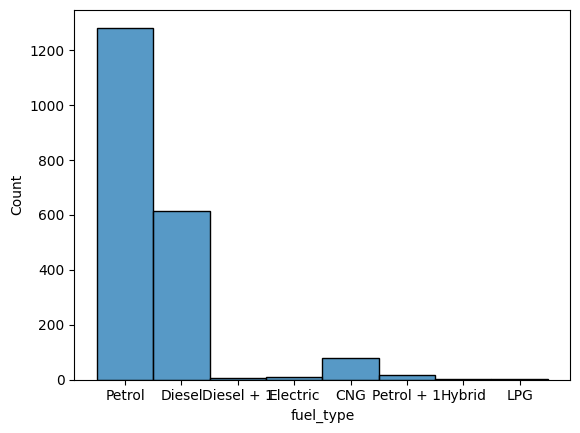

In [165]:
sns.histplot(df['fuel_type'])

In [166]:
# as we know that there are diesel +1 and pertrol+1 so we are going to combine these 2 fuel type to diesel and petrol resp.
df.loc[df["fuel_type"] == "Diesel + 1", "fuel_type"] = "Diesel"


In [167]:
df.loc[df["fuel_type"] == "Petrol + 1", "fuel_type"] = "Petrol"

<Axes: xlabel='fuel_type', ylabel='Count'>

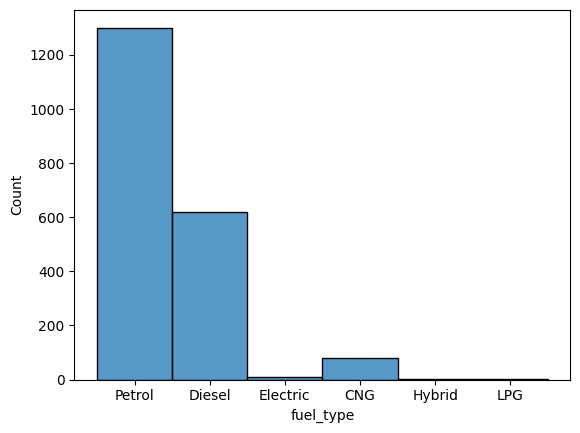

In [168]:
sns.histplot(df['fuel_type'])

In [169]:
df['fuel_type'].value_counts()

fuel_type
Petrol      1301
Diesel       620
CNG           79
Electric       9
Hybrid         2
LPG            2
Name: count, dtype: int64

In [170]:
df = df.drop(df[(df.fuel_type == "Hybrid")].index)
# removing the 2 type of fuel as they are very low in numbers and not so common. Further as we know that CNG and Electric both are eco fuel
# so we rename these both type with eco_fuel

In [171]:
df = df.drop(df[(df.fuel_type == "LPG")].index)


In [172]:
df['fuel_type'] = df['fuel_type'].replace(['Electric', 'CNG'], 'eco_fuel')


<Axes: xlabel='fuel_type', ylabel='Count'>

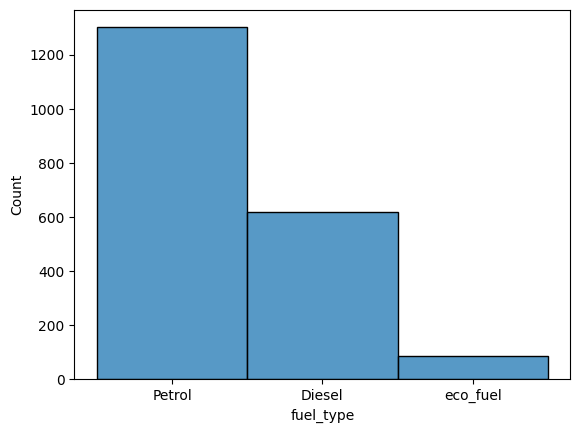

In [173]:
sns.histplot(df['fuel_type'])   # by cleaning the data we can observe the data closely and relatively

# cleaning car name

In [174]:
# firstcleaning the name with only first word
df.insert(1, "car_brand", df["car_name"].str.split(" ").str[0])
df

,car_name,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,Maruti,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,Tata,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,Maruti,695000.0,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,1200000.0,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,Ford,360000.0,42158.0,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,MINI,2200000.0,68862.0,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,Hyundai,838000.0,37622.0,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,Maruti,675000.0,64726.0,Petrol,Mumbai,2017


In [175]:
df= df.drop(['car_name'],axis = 1)
df

,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti,695000.0,45000.0,Petrol,Thane,2016
4,Jeep,1200000.0,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford,360000.0,42158.0,Diesel,Kolkata,2015
2101,MINI,2200000.0,68862.0,Diesel,Hyderabad,2013
2102,Hyundai,838000.0,37622.0,Petrol,Chennai,2018
2103,Maruti,675000.0,64726.0,Petrol,Mumbai,2017


In [176]:
df

,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti,695000.0,45000.0,Petrol,Thane,2016
4,Jeep,1200000.0,11193.0,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford,360000.0,42158.0,Diesel,Kolkata,2015
2101,MINI,2200000.0,68862.0,Diesel,Hyderabad,2013
2102,Hyundai,838000.0,37622.0,Petrol,Chennai,2018
2103,Maruti,675000.0,64726.0,Petrol,Mumbai,2017


In [177]:
#df.to_csv('file1.csv',index=True)

In [178]:
df['car_brand'].value_counts()

car_brand
Maruti           539
Hyundai          415
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
Jeep              26
MG                24
Nissan            18
Land              18
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: count, dtype: int64

In [179]:
top_10_car_names = df['car_brand'].value_counts().nlargest(10)


# Filter the DataFrame to keep only the rows with car names in the top 10
filtered_df = df[df['car_brand'].isin(top_10_car_names.index)]

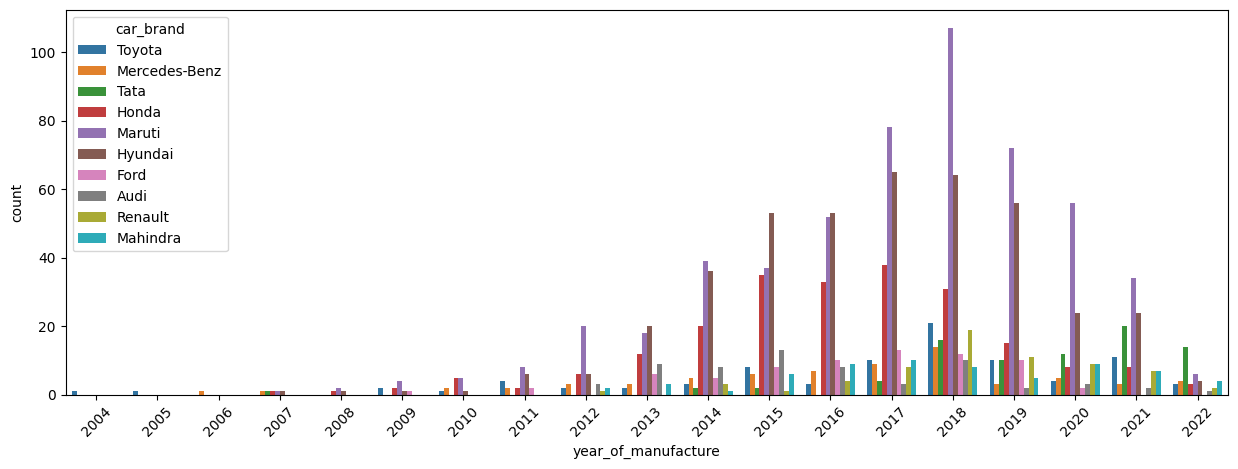

In [180]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['year_of_manufacture'], hue = filtered_df['car_brand'])
plt.xticks(rotation=45)
plt.show()

#plot = sns.countplot(x = 'year_of_manufacture', hue = 'car_brand', data= df)
# as per the data maruti has been most demanding car brand and in 2018 it was demand was higest

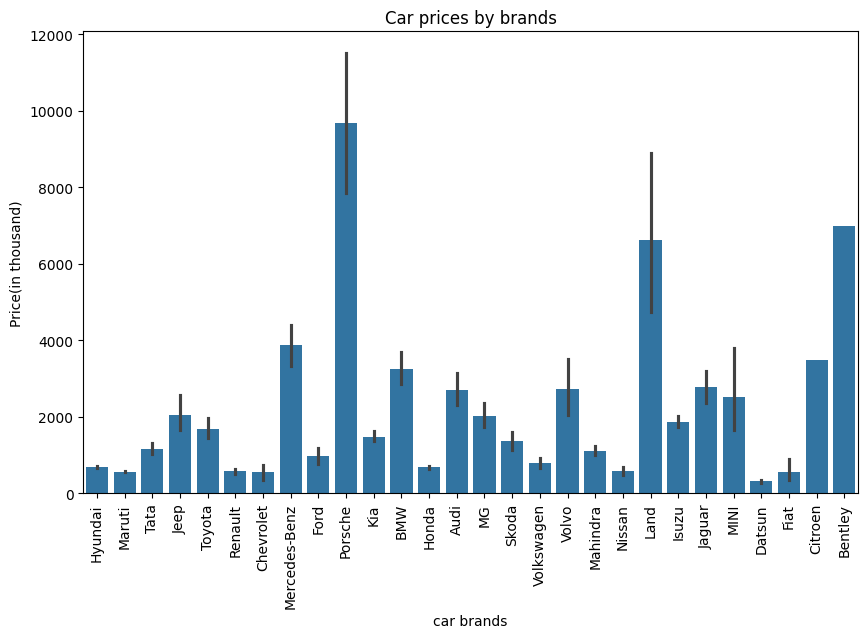

In [181]:
plt.figure(figsize = (10,6))
df.loc[:,'carprice'] = df['carprice']/1000 # to convert the price in smaller size
sns.barplot(x = df['car_brand'], y = df['carprice'])
plt.title("Car prices by brands")
plt.xlabel('car brands')
plt.ylabel('Price(in thousand)')
plt.xticks(rotation=90)
plt.show()

# it seems that the most expensive car is porsche and datsun is least expensive

In [182]:
df.groupby(df['fuel_type']).kms_driven.mean()

fuel_type
Diesel      65606.191935
Petrol      40286.431207
eco_fuel    48035.965909
Name: kms_driven, dtype: float64

In [183]:
df.groupby(df['car_brand']).kms_driven.mean()

car_brand
Audi              61031.096774
BMW              111809.545455
Bentley           19506.000000
Chevrolet         86776.000000
Citroen           27000.000000
Datsun            35518.000000
Fiat              49571.000000
Ford              54676.971014
Honda             49490.800000
Hyundai           42481.633735
Isuzu             76008.500000
Jaguar            41950.111111
Jeep              37039.461538
Kia               25204.461538
Land              46289.000000
MG                21398.750000
MINI              46760.250000
Mahindra          54882.390625
Maruti            45583.428571
Mercedes-Benz     46238.294118
Nissan            53344.055556
Porsche            9250.000000
Renault           37464.984615
Skoda             59008.022222
Tata              31377.703704
Toyota            70303.069767
Volkswagen        52983.830508
Volvo             57192.230769
Name: kms_driven, dtype: float64

<Axes: xlabel='city'>

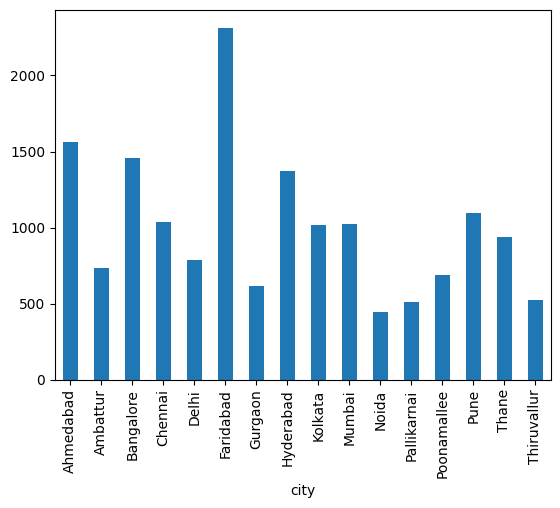

In [184]:
# groupby function

df.groupby(by='city').carprice.mean().plot.bar() # group by city and calculating mean of carprice for each group



<Axes: xlabel='fuel_type'>

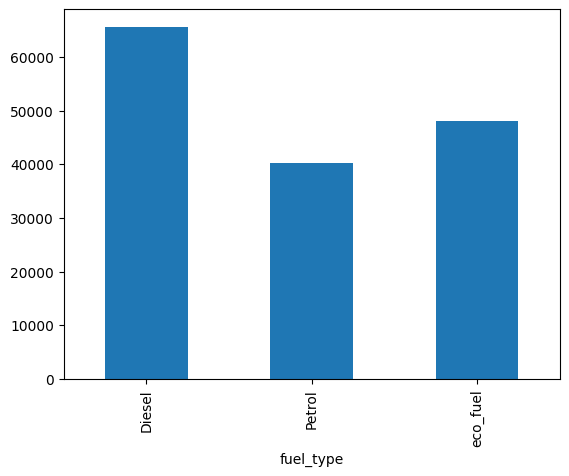

In [185]:
df.groupby(by='fuel_type').kms_driven.mean().plot.bar()

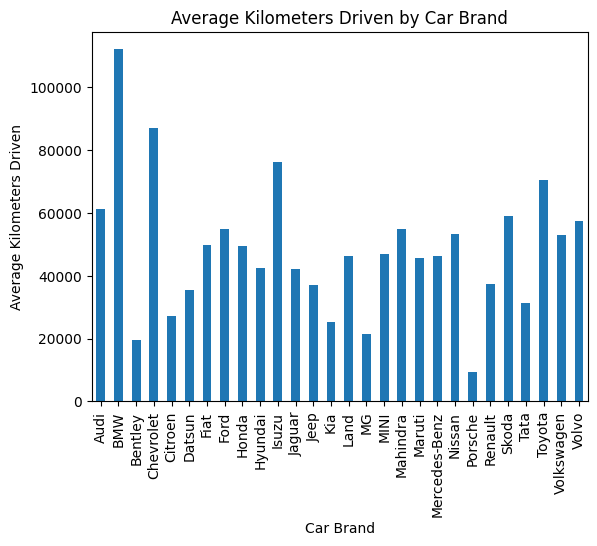

In [186]:
df.groupby(df['car_brand']).kms_driven.mean().plot.bar()

plt.xlabel('Car Brand')
plt.ylabel('Average Kilometers Driven')
plt.title('Average Kilometers Driven by Car Brand')
plt.show()

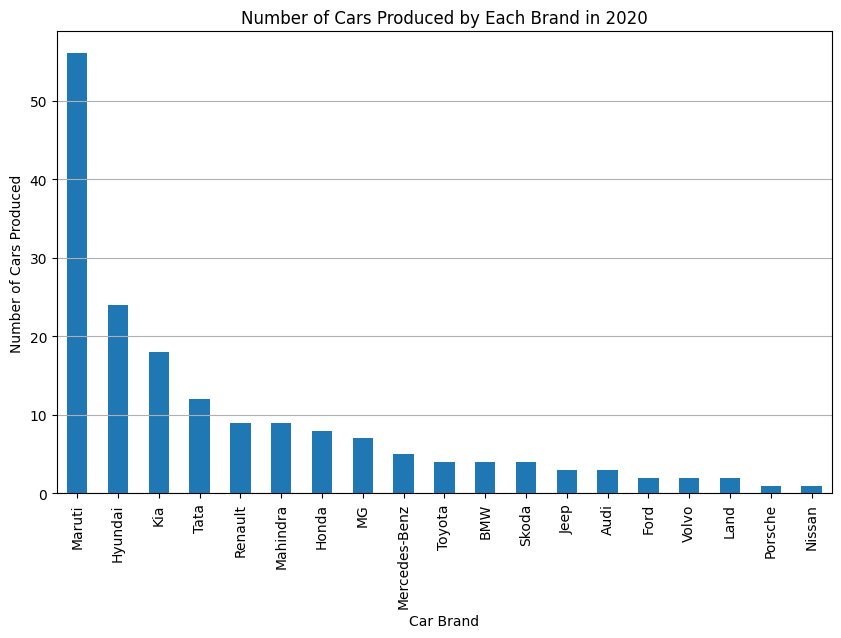

In [187]:
# we wil be calculating the number of car produced in cartain year
# Filter the DataFrame for cars produced in the year 2020
df_2020 = df[df['year_of_manufacture'] == 2020]

# Group by 'car_brand' and count the occurrences
car_brand_counts_2020 = df_2020['car_brand'].value_counts()

# Plot the result as a bar plot
car_brand_counts_2020.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Car Brand')
plt.ylabel('Number of Cars Produced')
plt.title('Number of Cars Produced by Each Brand in 2020')
plt.grid(axis='y')
plt.show()

In [188]:
#crosstab function pd.crosstab() is a Pandas function used to compute a cross-tabulation of two (or more) factors.it takes several parameters index,column,values,aggfunc
car_brand_fuel_type_carprice = pd.crosstab(index=df['car_brand'], columns=df['fuel_type'], values=df["carprice"], aggfunc='mean')

print(car_brand_fuel_type_carprice)

fuel_type           Diesel       Petrol     eco_fuel
car_brand                                           
Audi           2436.115385  4075.500000          NaN
BMW            3125.645833  4162.857143          NaN
Bentley                NaN  7000.000000          NaN
Chevrolet       562.500000          NaN          NaN
Citroen        3500.000000          NaN          NaN
Datsun                 NaN   317.230769          NaN
Fiat            350.000000   648.500000          NaN
Ford           1268.972973   632.935484   677.000000
Honda           691.571429   686.879397          NaN
Hyundai         958.835821   643.608309   598.818182
Isuzu          1870.250000          NaN          NaN
Jaguar         2814.142857  2687.500000          NaN
Jeep           1813.692308  2295.615385          NaN
Kia            1651.727273  1417.678571          NaN
Land           6250.230769  7639.800000          NaN
MG             2892.166667  1735.823529  1919.000000
MINI           1837.500000  3200.000000       

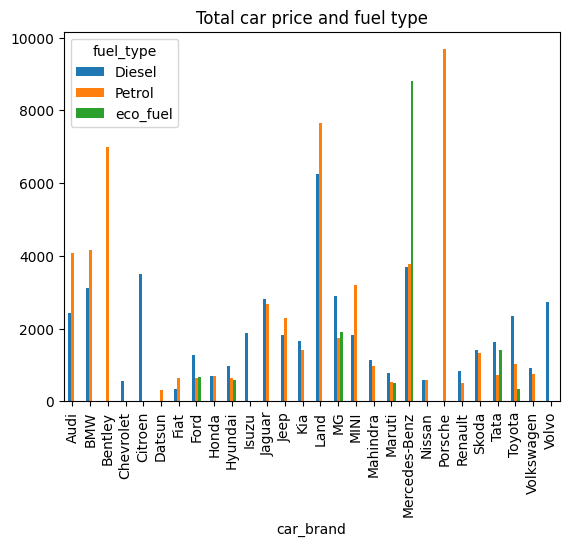

In [189]:
car_brand_fuel_type_carprice.plot(kind='bar',title = 'Total car price and fuel type')
plt.show()



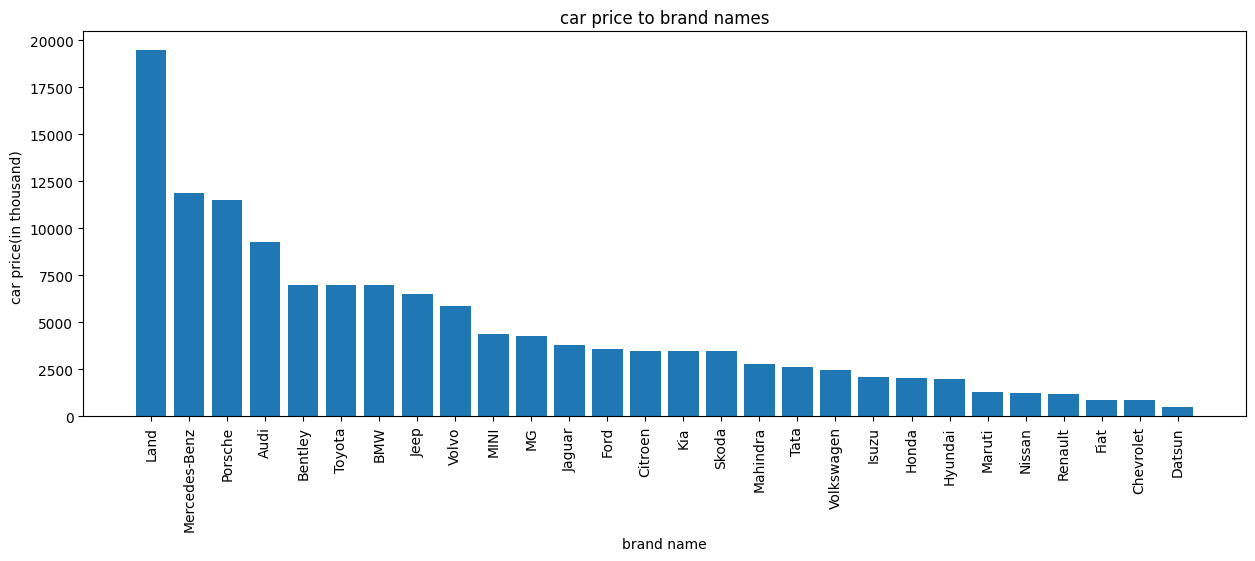

In [190]:
df= df.sort_values(by = "carprice",ascending = False)

plt.figure(figsize=(15,5))
x = df['car_brand']
y = df["carprice"]
plt.bar(x,y )
plt.xlabel('brand name')
plt.ylabel('car price(in thousand) ')
plt.title('car price to brand names')
plt.xticks(rotation=90)

#plt.legend()
plt.plot()
plt.show()
# this polt the most expensive car

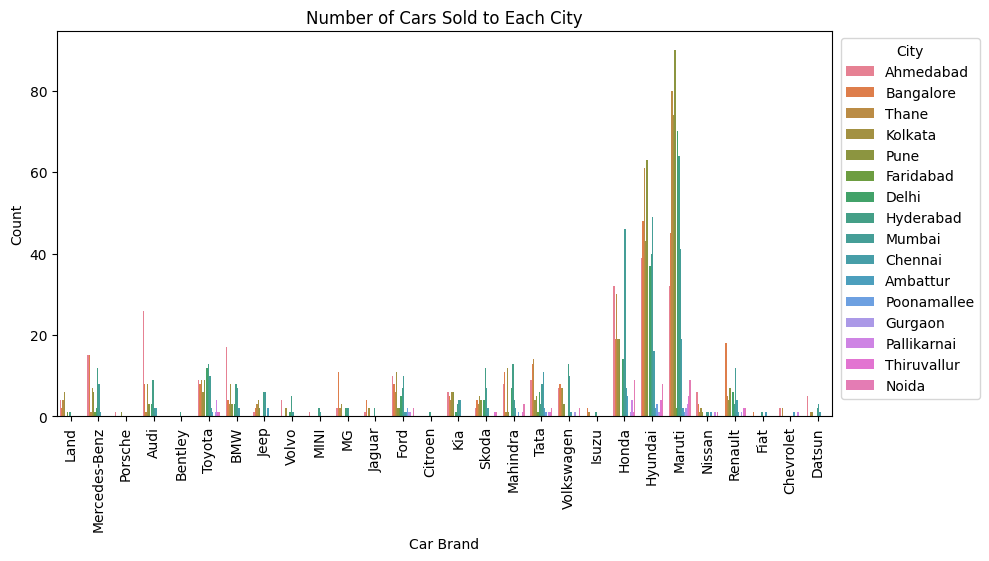

In [191]:
import plotly.express as px

# Assuming 'car_brand' and 'city' are columns in your DataFrame
plt.figure(figsize=(10, 5))
sns.countplot(x='car_brand', hue='city', data=df)
plt.title('Number of Cars Sold to Each City')
plt.ylabel('Count')
plt.xlabel('Car Brand')
plt.legend(title='City', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=90)
plt.show()

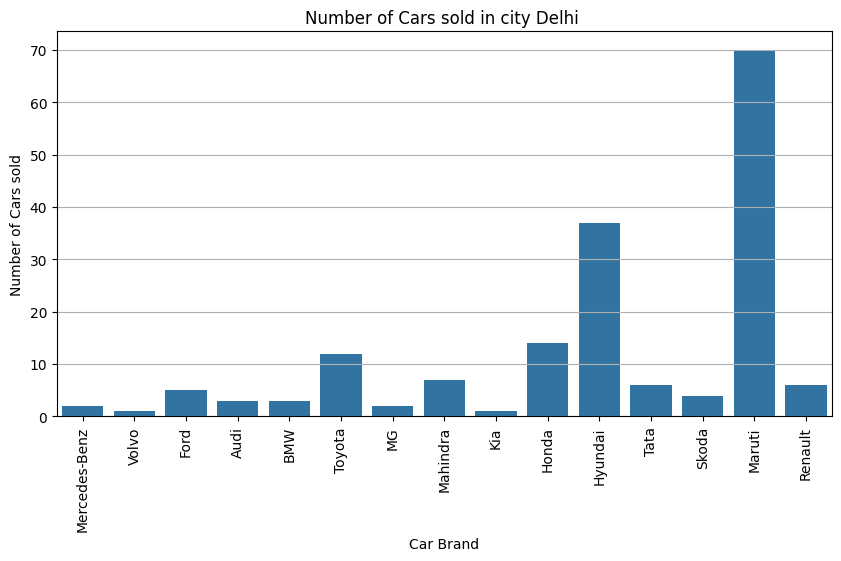

In [192]:
# only plotting the data on hte basis of specific city
df_city = df[df['city'] == 'Delhi']
plt.figure(figsize = (10,5))
plot = sns.countplot(x='car_brand', data= df_city)
plt.xticks(rotation=90)

plt.xlabel('Car Brand')
plt.ylabel('Number of Cars sold')
plt.title('Number of Cars sold in city Delhi ')
plt.grid(axis='y')
plt.show()

In [193]:
import plotly.express as px
# Pie chart
fig = px.pie(df, names='city', title='Distribution of number of cars in City')
fig.show()

Converting the data in unique code




In [194]:

df

,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
1392,Land,19500.000,45000.0,Diesel,Ahmedabad,2018
1850,Land,13600.000,36000.0,Diesel,Bangalore,2019
313,Land,12300.000,39012.0,Diesel,Thane,2019
1340,Mercedes-Benz,11900.000,24500.0,Petrol,Kolkata,2017
21,Porsche,11500.000,6500.0,Petrol,Pune,2020
...,...,...,...,...,...,...
1133,Maruti,150.000,150000.0,Petrol,Ambattur,2007
1656,Hyundai,142.000,46733.0,Petrol,Kolkata,2010
376,Tata,110.000,18000.0,Petrol,Ahmedabad,2015
1635,Maruti,99.991,29012.0,Petrol,Kolkata,2008


In [195]:
from sklearn.preprocessing import OrdinalEncoder
list=['car_brand', 'fuel_type','city',"year_of_manufacture"]
ord_enc= OrdinalEncoder()
for column in list:
    df[column]= ord_enc.fit_transform(df[[column]])

df.loc[:,'carprice'] = df['carprice']*1000 # to convert the price back to original price
print(df)

      car_brand    carprice  kms_driven  fuel_type  city  year_of_manufacture
1392       14.0  19500000.0     45000.0        0.0   0.0                 14.0
1850       14.0  13600000.0     36000.0        0.0   2.0                 15.0
313        14.0  12300000.0     39012.0        0.0  14.0                 15.0
1340       19.0  11900000.0     24500.0        1.0   8.0                 13.0
21         21.0  11500000.0      6500.0        1.0  13.0                 16.0
...         ...         ...         ...        ...   ...                  ...
1133       18.0    150000.0    150000.0        1.0   1.0                  3.0
1656        9.0    142000.0     46733.0        1.0   8.0                  6.0
376        24.0    110000.0     18000.0        1.0   0.0                 11.0
1635       18.0     99991.0     29012.0        1.0   8.0                  4.0
499        24.0     60000.0     50000.0        0.0  11.0                  3.0

[2009 rows x 6 columns]


In [196]:
df.corr()


,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
car_brand,1.000000,-0.063218,-0.037207,0.055497,0.054604,0.139578
carprice,-0.063218,1.000000,-0.001136,-0.321641,-0.120582,0.258422
kms_driven,-0.037207,-0.001136,1.000000,-0.117027,0.033633,-0.164576
fuel_type,0.055497,-0.321641,-0.117027,1.000000,0.170907,0.068811
city,0.054604,-0.120582,0.033633,0.170907,1.000000,-0.062131
year_of_manufacture,0.139578,0.258422,-0.164576,0.068811,-0.062131,1.000000


In [197]:
df.describe()


,car_brand,carprice,kms_driven,fuel_type,city,year_of_manufacture
count,2009.000000,2.009000e+03,2.009000e+03,2009.000000,2009.000000,2009.000000
mean,14.286710,1.137953e+06,4.843985e+04,0.735192,7.124440,13.022897
std,6.847472,1.354360e+06,8.550894e+04,0.531443,4.678131,2.821459
min,0.000000,6.000000e+04,6.400000e+01,0.000000,0.000000,0.000000
25%,9.000000,4.750000e+05,2.500000e+04,0.000000,3.000000,11.000000
50%,17.000000,6.990000e+05,4.290600e+04,1.000000,8.000000,13.000000
75%,18.000000,1.150000e+06,6.300000e+04,1.000000,11.000000,15.000000
max,27.000000,1.950000e+07,3.600000e+06,2.000000,15.000000,18.000000


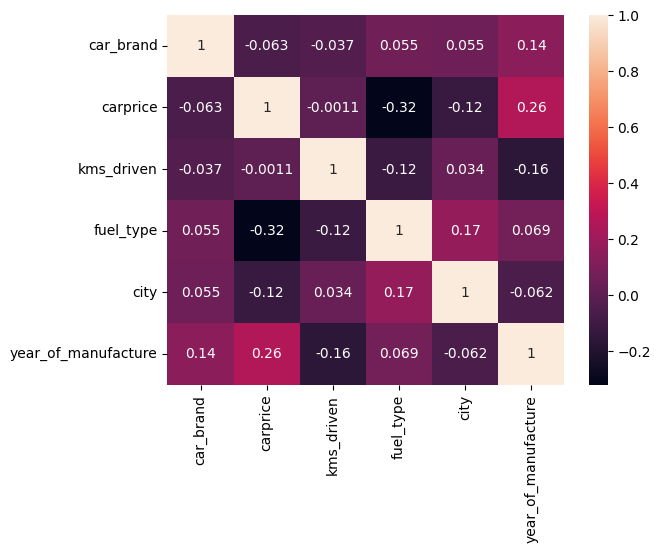

In [198]:
# plotting data in heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

applying machine learning


In [199]:
from sklearn.model_selection import train_test_split
X = df.drop('carprice', axis=1)  # assigning the value of x excluding the car price
y = df['carprice'] # assigning value of y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [200]:
print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)
print("y_train_shape",y_train.shape)
print("y_test_shape",y_test.shape)


X_train_shape (1607, 5)
X_test_shape (402, 5)
y_train_shape (1607,)
y_test_shape (402,)


In [201]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # initializing the model
model.fit(X_train, y_train) # fitting the model on training data
# fit() model calculates the intercept and coefficient of linear regression


LinearRegression()

In [202]:
# after the model is trained (fit) we have to make predictions on a new test data,
#after predictions are done we have to analyse its performance to know how well the predictions generalize the test data set
# for the purpose we have to use various metrices to evaluate the performance of linear regression model.
y_pred = model.predict(X_test)

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)  # measures the propositions of variations in dependent variable caused by independent variable
mse = mean_squared_error(y_test, y_pred) # measures the avg. squared difference between the predicted values
mae = mean_absolute_error(y_test, y_pred) # measures absolute difference
r2 = r2_score(y_test, y_pred) # it measures how well the observed outcome y_test are replicated by the model y_pred

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", evs)


Mean Squared Error: 881846706074.137
Mean Absolute Error: 637881.9030210967
R-squared: 0.26662200353255405
Explained Variance Score: 0.27801195824990144


In [204]:
intercept = model.intercept_  # this will predict the car price when all the predictors are zero
coefficients = model.coef_ # this will measure the impact of change in one independent variables to dependent variable

print("Intercept:", intercept)
print("Coefficients:", coefficients)
# the coefficents means that a unit change in selected vaiables has mentioned impact in car price. which means
# a unit decrease in car brand will decrease the price of a car by -1.52446077e+04  and so no.

Intercept: 131797.1979622729
Coefficients: [-1.52446077e+04  1.63255624e-01 -8.27209549e+05 -1.19686566e+04
  1.48422252e+05]


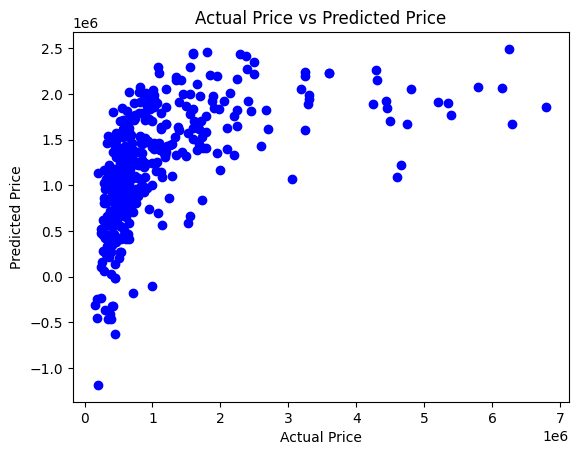

In [205]:
# lets plot the data
plt.scatter(y_test, y_pred, color = 'b',)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [206]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [207]:
y_pred = rf_model.predict(X_test)

In [208]:
evs = explained_variance_score(y_test, y_pred)  # measures the propositions of variations in dependent variable caused by independent variable
mse = mean_squared_error(y_test, y_pred) # measures the avg. squared difference between the predicted values
mae = mean_absolute_error(y_test, y_pred) # measures absolute difference
r2 = r2_score(y_test, y_pred) # it measures how well the observed outcome y_test are replicated by the model y_pred

intercept = model.intercept_  # this will predict the car price when all the predictors are zero
coefficients = model.coef_ # this will measure the impact of change in one independent variables to dependent variable

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", evs)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Mean Squared Error: 490442101507.94714
Mean Absolute Error: 380794.0957462687
R-squared: 0.5921292858387751
Explained Variance Score: 0.6107994939634349
Intercept: 131797.1979622729
Coefficients: [-1.52446077e+04  1.63255624e-01 -8.27209549e+05 -1.19686566e+04
  1.48422252e+05]


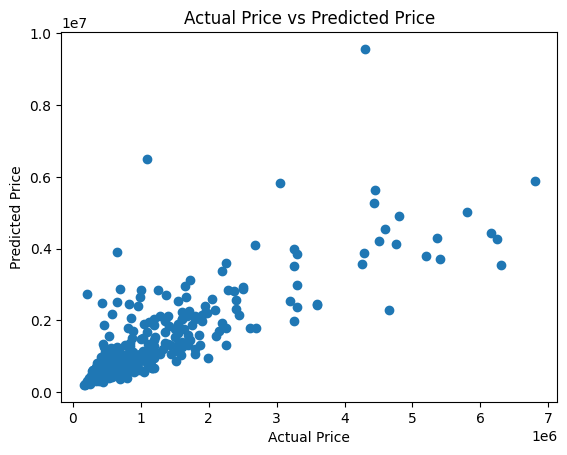

In [209]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


to conclude random forest model is better than linear regression model as it has higher r square and explained variance score which measeres the greater variace in target variable.